## Paso 1: Cargar el conjunto de datos Iris
El conjunto de datos Iris es muy conocido y está disponible en la librería de `scikit-learn`. El conjunto de datos completo tiene tres clases de flores y cuatro características, pero para este ejercicio, vamos a simplificarlo a dos clases y dos características. Usaremos la clase `Perceptron` de `scikit-learn` para entrenar nuestro modelo.


In [1]:
# Importar bibliotecas necesarias
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Cargar el conjunto de datos Iris
iris = load_iris()

# Convertir a DataFrame de pandas para fácil manipulación
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Mostrar las primeras filas del conjunto de datos
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Paso 2: Seleccionar dos clases y dos características
Para simplificar el problema de clasificación, seleccionamos solo dos clases de flores (setosa y versicolor) y dos características (largo y ancho del sépalo).


In [2]:
# Seleccionar solo las dos primeras clases (setosa y versicolor) y dos características
# Las clases son 0 (setosa) y 1 (versicolor)
iris_binary = iris_df[iris_df['species'].isin([0, 1])]

# Seleccionar solo las dos primeras características (largo y ancho del sépalo)
X = iris_binary.iloc[:, [0, 1]].values  # Largo del sépalo, Ancho del sépalo
y = iris_binary['species'].values       # Clases 0 (setosa) y 1 (versicolor)

# Mostrar el conjunto de datos simplificado
iris_binary.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Paso 3: Entrenar el perceptrón
El perceptrón es un algoritmo simple de clasificación que se asemeja a un modelo lineal. Vamos a entrenar el perceptrón usando las dos clases y dos características seleccionadas en el paso anterior.


In [3]:
# Importar el modelo Perceptrón de scikit-learn
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo de perceptrón
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# Entrenar el modelo en los datos de entrenamiento
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

## Paso 4: Evaluar el modelo
Después de entrenar el perceptrón, lo evaluamos con el conjunto de prueba para verificar su rendimiento en clasificar las dos clases de flores (setosa y versicolor).


In [4]:
# Realizar predicciones en los datos de prueba
y_pred = perceptron.predict(X_test)

# Calcular la exactitud del modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del Perceptrón: {accuracy * 100:.2f}%")

Exactitud del Perceptrón: 100.00%


## Paso 5: Visualizar la frontera de decisión
Podemos visualizar cómo el perceptrón está separando las dos clases de flores mediante la creación de una gráfica que muestra la frontera de decisión entre las dos clases.


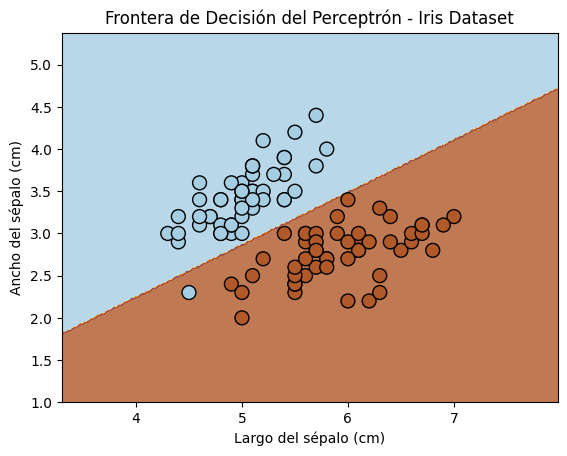

In [5]:
import matplotlib.pyplot as plt

# Crear una malla de puntos para visualizar la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predecir en toda la malla
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Graficar los puntos de datos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.Paired)

# Etiquetas y títulos
plt.xlabel('Largo del sépalo (cm)')
plt.ylabel('Ancho del sépalo (cm)')
plt.title('Frontera de Decisión del Perceptrón - Iris Dataset')

plt.show()